In [8]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import optuna
import xgboost as xgb

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [9]:
scores_linear = pd.read_csv('~/Documents/AmesHousingML/masterScores_linear.csv') 
scores_lassoRidgeElastic = pd.read_csv('~/Documents/AmesHousingML/masterScores_lassoRidgeElastic.csv') 
scores_randomForest = pd.read_csv('~/Documents/AmesHousingML/masterScores_randomForest.csv') 
scores_xgboost = pd.read_csv('~/Documents/AmesHousingML/masterScores_xgboost.csv') 
scores_df = pd.concat([scores_linear, scores_lassoRidgeElastic, scores_randomForest, scores_xgboost], ignore_index=True)

In [11]:
scores_df

,Model,r2_5kf_mean,rmse_5kf_mean
0,linear,0.905442,21771.664947
1,lasso,0.906500,21690.236947
2,ridge,0.904300,21971.935023
3,elastic-net,0.895977,22986.442915
4,randomForest,0.900705,21029.598687
5,xgboost,0.907785,20254.617265


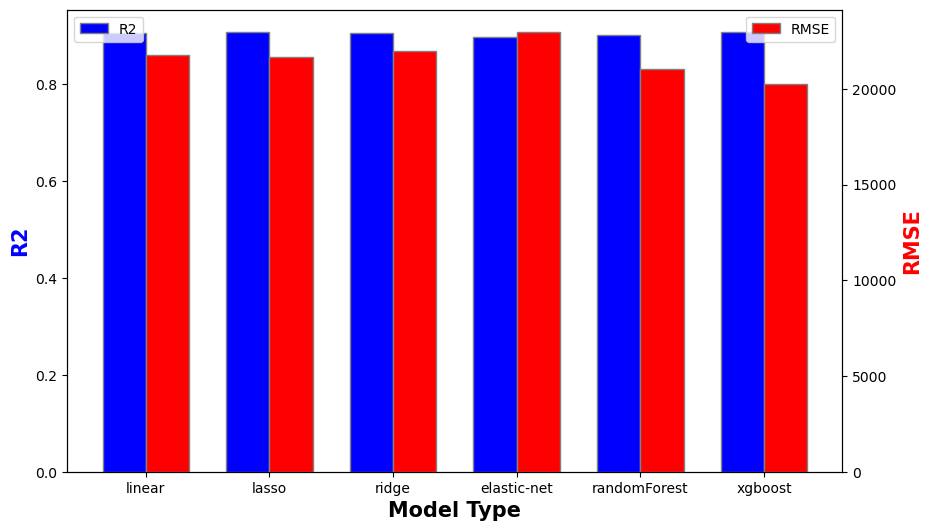

In [16]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Position of bars on X-axis
r1 = range(len(scores_df['Model']))
r2 = [x + bar_width for x in r1]

# Plot R2 bars on the primary y-axis (left)
ax1.bar(r1, scores_df['r2_5kf_mean'], color='b', width=bar_width, edgecolor='grey', label='R2')

# Create a secondary y-axis (right) for RMSE
ax2 = ax1.twinx()
ax2.bar(r2, scores_df['rmse_5kf_mean'], color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Add labels, title, and legend
ax1.set_xlabel('Model Type', fontweight='bold', fontsize=15)
ax1.set_ylabel('R2', fontweight='bold', color='b', fontsize=15)
ax2.set_ylabel('RMSE', fontweight='bold', color='r', fontsize=15)
ax1.set_xticks([r + bar_width / 2 for r in range(len(scores_df['Model']))])
ax1.set_xticklabels(scores_df['Model'])
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()